<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## Aula 03: Radiação Eletromagnética

**Luciano Barosi**

## Equações de Maxwell

    Observamos o universo por intermédio de radiações eletromagnéticas. Inicialmente apenas com a luz, desde o século XX começamos a usar cada vez maior número de faixas de freqência, com telescópios  e radiotelescópios localizados na Terra ou no Espaço.
    
    James Clerck Maxwell, em 1865, demonstra teoricamente que a luz é um fenômeno eletromagnético que viaja com uma velocidade fixa que pode ser obtida por meio de medidas elétricas e magnéticas na matéria.
    
    Para fazer isto Maxwell reescreveu o conhecimento da época em termos do cálculo vetorial e pode obter uma equação de onda.

In [1]:
eqsM = Inactivate[{
    gaussE = Div[\[ScriptCapitalE][x, y, z, t], {x, y, z}] == \[Rho][x, y, z,t],
    gaussB = Div[\[ScriptCapitalB][x, y, z, t], {x, y, z}] == 0,
    faraday = Curl[\[ScriptCapitalE][x, y, z, t], {x, y, z}] == -D[\[ScriptCapitalB][x, y, z, t], t], 
   ampere = Curl[\[ScriptCapitalB][x, y, z, t], {x, y, z}] ==  \[Mu] j[x, y, z, t] + D[\[ScriptCapitalE][x, y, z, t], t]}, 
  Div | Curl | D];

Inactive[Div][ℰ[x, y, z, t], {x, y, z}] == ρ[x, y, z, t]

Inactive[Div][ℬ[x, y, z, t], {x, y, z}] == 0

Inactive[Curl][ℰ[x, y, z, t], {x, y, z}] == -Inactive[D][ℬ[x, y, z, t], t]

Inactive[Curl][ℬ[x, y, z, t], {x, y, z}] == 
 
>    μ j[x, y, z, t] + Inactive[D][ℰ[x, y, z, t], t]
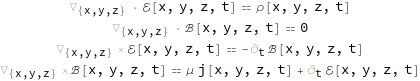

In [2]:
Grid[Transpose[{eqsM}]]

As equações acima são as equações de Maxwell, cada uma delas tem um conteúdo físico de extrema validade:
1. A primeira equação é a **Lei de Gauss**, que determina como as cargas elétricas geram campos elétricos no espaço, sendo equivalente a Lei de Coulomb para uma particula pontual.
2. A segunda equação é a **Lei de Gauss para o Magnetismo** que indica que não existe um monopolo magnético.
3. A equação 3 é a **Lei de Faraday** que mostra como uma variação de um campo magnético pode produzir um campo elétrico e, portanto, corrente em um fio. Todas as aplicações da corrente alternada que vemos em nosso dia a dia é uma aplicação desta lei.
4. A 4 equação é a **Lei de Ampere-Maxwell** que descreve as correntes como fontes de campo magnético. Maxwell introduziu o termo com a derivada temporal por razões de conservação de energia. Este termo, que indica que variações de campo elétrico também produzem campo magnético é crucial para a existência de uma onda eletromagnética.

Considerando o espaço vazio, veremos que existe uma configuração não-trivial que é solução destas equações. Esta solução é formada por um campo elétrico oscilante no espaço que produz um campo magnético oscilante no espaço que por sua vez restaura o campo elétrico no espaço.... a solução de propagação de uma onda eletromagnética.

Se aplicarmos o rotacional na Lei de Ampere e utilizarmos a Lei de Faraday teremos:

In [3]:
Inactive[Curl][#, {x, y, z}] & /@ ampere /. j -> (0 &)
% /. Inactivate[Curl[D[v_, t_], x_] :> D[Curl[v, x], t]]
% /. Solve[faraday, 
   Inactive[Curl][\[ScriptCapitalE][x, y, z, t], {x, y, z}]][[1]] 

Inactive[Curl][Inactive[Curl][ℬ[x, y, z, t], {x, y, z}], {x, y, z}] == 
 
>   Inactive[Curl][Inactive[D][ℰ[x, y, z, t], t], {x, y, z}]
Inactive[Curl][Inactive[Curl][ℬ[x, y, z, t], {x, y, z}], {x, y, z}] == 
 
>   Inactive[D][Inactive[Curl][ℰ[x, y, z, t], {x, y, z}], t]
Inactive[Curl][Inactive[Curl][ℬ[x, y, z, t], {x, y, z}], {x, y, z}] == 
 
>   Inactive[D][-Inactive[D][ℬ[x, y, z, t], t], t]

In [6]:
wave = Activate[%]

(0,0,2,0)                (0,2,0,0)                (2,0,0,0)
ℬ         [x, y, z, t] + ℬ         [x, y, z, t] + ℬ         [x, y, z, t] == 
 
      (0,0,0,2)
>   -ℬ         [x, y, z, t]

In [7]:
%//TraditionalForm//TeXForm

\mathcal{B}^{(0,0,2,0)}(x,y,z,t)+\mathcal{B}^{(0,2,0,0)}(x,y,z,t)+\mathcal{B}^{(2,0,0,0)\
 
>   }(x,y,z,t)=-\mathcal{B}^{(0,0,0,2)}(x,y,z,t)

A expressão acima para o campo $\vec B$ é a aplicação do operador Dalembertiano, ou seja, a equação acima é uma equação de onda. Na equação acima consideramos as constantes $\epsilon_0$ e $\mu_0$ iguais a 1. Se re-inserimos as constantes podemos ver que:
$$\frac{1}{c^2} \frac{\partial^2 \vec B}{\partial\; t^2} = \Delta \vec B .$$

Podemos mostrar analogamente que o campo elétrico satisfaz equação semelhante:
$$\frac{1}{c^2} \frac{\partial^2 \vec E}{\partial\; t^2} = \Delta \vec E .$$

w estamos fazendo a identificação da velocidade $C$ com a velocidade da luz que é ada por:
$$ c = \frac{1}{\sqrt{\epsilon_0 \mu_0}} $$

A Partir daí não é difícil mostrar que podemos escrever uma solução de onda plana monocromática como:
$$\vec E(\vec r, t) = \tilde E_0 e^{i(\vec k \cdot \vec r - \omega t)}\hat n $$
$$\vec B(\vec r, t) = \frac{\tilde E_0}{c} e^{i(\vec k \cdot \vec r - \omega t)} (\hat k \times \hat n) = \frac{1}{c} \hat k \times \vec E $$

As equações de Gauss mostram que a onda eletromagnética é **transversal**, a lei de Ampere-Maxwell determina a relação entre as amplitudes do Campo Magnético e Campo Elétrico e o fato de serem perpendiculares entre si. O vetor $\hat n$ indica a **polarização**, para a qual existe duas escolhas independentes. (Os campos devem se mover apenas no plano perpendicular a direção de propagação).

## Radiação de Corpo Negro

Um corpo perfeitamente opaco, não refletivo, em equilíbrio térmico com o ambiente produz radiação eletromagnética de espectro contínuo, chamada de **radiação térmica** ou **radiação de corpo negro**.

Podemos estudar esta radiação, produzida pela interação da matéria, utilizando os métodos da mecânica estatística. Para fazer isto consideramos uma construção de corpo negro que é construída como sendo uma cavidade cúbica de lado L, perfeitamente refletora em seu interior e perfeitamente absorvedora em seu interior, com um orifício bem pequeno por onde ela emite radiação térmica.

In [8]:
Symbolize[Subscript[k, B]];
Symbolize[Subscript[n, x_]];
Symbolize[Subscript[\[Mu], x_]];
Symbolize[Subscript[\[Lambda], x_]];
Symbolize[Subscript[T, x_]];
Symbolize[Subscript[\[Sigma], x_]];
Symbolize[Subsuperscript[\[ScriptCapitalZ], 1, x_]];
Symbolize[Subsuperscript[\[ScriptCapitalG], 1, x_]];
Symbolize[Subsuperscript[S, 1, x_]];
Symbolize[Overscript[n, _]];
Symbolize[Overscript[Subscript[n, x_], _]];

{k  ->            1380649                              , 
  B    ------------------------------ joules per kelvin
       100000000000000000000000000000
 
>   ℏ ->                   132521403                                }
         --------------------------------------------- second joules
         400000000000000000000000000000000000000000 Pi
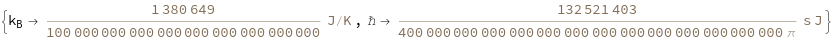

In [19]:
subs = {Subscript[k, B] -> Entity["PhysicalConstant", "BoltzmannConstant"]["Value"], 
       \[HBar] -> Entity["PhysicalConstant", "PlanckConstant"]["Value"]/(2 Pi)}

In [20]:
MyAssumptions={k>0, L>0,m>0,V>0,g>0,Subscript[k, B]>0,n_>0,Overscript[n, _]>0,T>0,\[HBar]>0,\[Lambda]>0,\[Beta]>0,\[ScriptCapitalN]>0};
MySimplify=Simplify[#,MyAssumptions]&;
MyFullSimplify=FullSimplify[#,MyAssumptions]&;

In [23]:
\[Beta]ToT = {\[Beta]->1/(Subscript[k, B]T)};
\[Omega]Toy = {\[Omega]->(Subscript[k, B]T y)/\[HBar] ,\[Beta]->1/(Subscript[k, B]T)};
\[Omega]To\[Lambda] = {\[Omega]->(2\[Pi] c)/\[Lambda],\[Beta]->1/(Subscript[k, B]T)};

In [26]:
TeXForm@StandardForm@\[Beta]ToT
TeXForm@StandardForm@\[Omega]Toy
TeXForm@StandardForm@\[Omega]To\[Lambda]

\left\{\beta \to \frac{1}{T k_B}\right\}
\left\{\omega \to \frac{T y k_B}{\hbar },\beta \to \frac{1}{T k_B}\right\}
\left\{\omega \to \frac{2 c \pi }{\lambda },\beta \to \frac{1}{T k_B}\right\}

2   2     2   2     2   2
 2    n1  Pi    n2  Pi    n3  Pi
k  == ------- + ------- + -------
         2         2         2
        L         L         L
               2   2     2   2     2   2
          2  n1  Pi    n2  Pi    n3  Pi
         L  (------- + ------- + -------)
 2  2           2         2         2
k  L           L         L         L
----- == --------------------------------
   2                     2
 Pi                    Pi
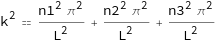
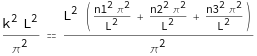

In [29]:
eq1 = k^2 == kx^2 + ky^2 + kz^2 /.{kx->n1 Pi/L, ky->n2 Pi/L, kz->n3 Pi/L }
eq1 = Assuming[L>0, MultiplySides[eq1, L^2/Pi^2]]

k L
---
Pi
 2  3
k  L
-----
   2
 Pi
                   3  2
                  L  ω
Inactive[g][ω] == ------
                   3   2
                  c  Pi
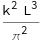
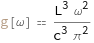

In [31]:
R = (Sqrt[eq1[[1]]]//MySimplify)
V[R_] := 4/3 Pi R^3
gk[k_] := 2 D[V[R],k]/8
k[x_] := x/c
gk[k]
g[y_] :=(gk[k] D[k[x],x]) /. k-> k[y]
Inactivate[g[\[Omega]]] == g[\[Omega]]

Do ponto de vista da mecânica clássica, cada modo possível do sistema carrega uma energia média $k_B T$, de forma que a intensidade espectral da radiação de corpo negro no regime clássico é dado pelo modelo de Rayleigh-Jeans:

2
T ω  k
      B
-------
 3   2
c  Pi
8 Pi T k
        B
---------
    4
   λ
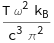
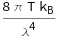

In [38]:
Subscript[\[ScriptCapitalI], RJ][\[Omega]] =  Subscript[k, B]T g[\[Omega]] /V /. V-> L^3
Irj[\[Lambda]]=Subscript[\[ScriptCapitalI], RJ][\[Omega]] \[Omega]/\[Lambda]/.\[Omega]To\[Lambda]

-Graphics-
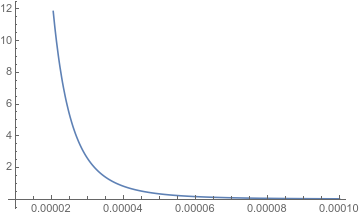

In [40]:
Plot[Irj[\[Lambda]] /. subs /. T -> 6000, {\[Lambda], 10^(-5),10^(-4) }]

Obviamente a função acima tem uma divergência para $\lambda \mapsto \infty$. Esta é conhecida como a **catástrofe do ultyravioleta** uma vez que seu significado físico diz que qualquer corpo a temperatura finita emitirá uma quantidade infinita de energia.

Vamos considerar uma solução ad-hoc para este problema, impedindo os estados de terem a mesma energia, fazendo com que sua energia dependa da frequência, que é a origem da divergência na expressão acima. A energia de um modo em uma dada frequência será **quantizada** em unidades dadas por

In [41]:
EE[\[Omega]]:=\[HBar] \[Omega]
Inactivate[\[ScriptCapitalE]]== EE[\[Omega]]

ℰ == ω ℏ

Aplicamos agora o formalismo canônico na mecânica estatística:

β ω ℏ
              E
Hold[Z ] == -----------
      1           β ω ℏ
            -1 + E
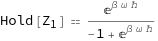

In [43]:
Subscript[Z, 1] = \!\(
\*UnderoverscriptBox[\(\[Sum]\), \(m = 0\), \(\[Infinity]\)]\(Exp[\(-\[Beta]\)\ m\ EE[\[Omega]]]\)\);
Hold[Subscript[Z, 1]]==Subscript[Z, 1]

1
-----------
      β ω ℏ
-1 + E
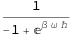

In [45]:
n = Sum[m Exp[-\[Beta] m EE[\[Omega]] ],{m,0,Infinity}] / Subscript[Z, 1]

3
        ω  ℏ
--------------------
 3        β ω ℏ    2
c  (-1 + E     ) Pi
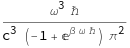

In [46]:
Iplanck[\[Omega]]= n EE[\[Omega]] g[\[Omega]]/V /. V-> L^3 

4  3   4
     T  y  k
            B
-------------------
 3        y    2  3
c  (-1 + E ) Pi  ℏ
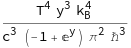

In [47]:
Ip[y] = Iplanck[\[Omega]] (Subscript[k, B]T)/\[HBar] /.\[Omega]Toy //Simplify

2  4   4
Pi  T  k
        B
----------
     3  3
 15 c  ℏ
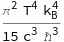

In [48]:
u = Integrate[Ip[y],{y,0,Infinity}]

In [49]:
(*Mathematica tem uma função Built in*)
PlanckRadiationLaw[Quantity[6000, "DegreesCelsius"], "Color"]
PlanckRadiationLaw[Quantity[5000, "DegreesCelsius"], "Color"]
PlanckRadiationLaw[Quantity[4000, "DegreesCelsius"], "Color"]

RGBColor[0.0870535, 0., 1.]
RGBColor[0., 1., 0.]
RGBColor[0.54188, 0., 0.]